In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.columns


Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [4]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [6]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [28]:
new_age = pd.get_dummies(df.age)
new_age

,30-34,35-39,40-44,45-49
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1138,0,0,0,1
1139,0,0,0,1
1140,0,0,0,1
1141,0,0,0,1


In [29]:
new_gender = pd.get_dummies(df.gender)
new_gender

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1138,1,0
1139,1,0
1140,1,0
1141,1,0


In [30]:
x = pd.concat([df, new_age, new_gender],axis='columns')
x

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,30-34,35-39,40-44,45-49,F,M
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1,0,0,0,0,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,1,0,0,0,0,1
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,1,0,0,0,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,1,0,0,0,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0,0,0,1,1,0


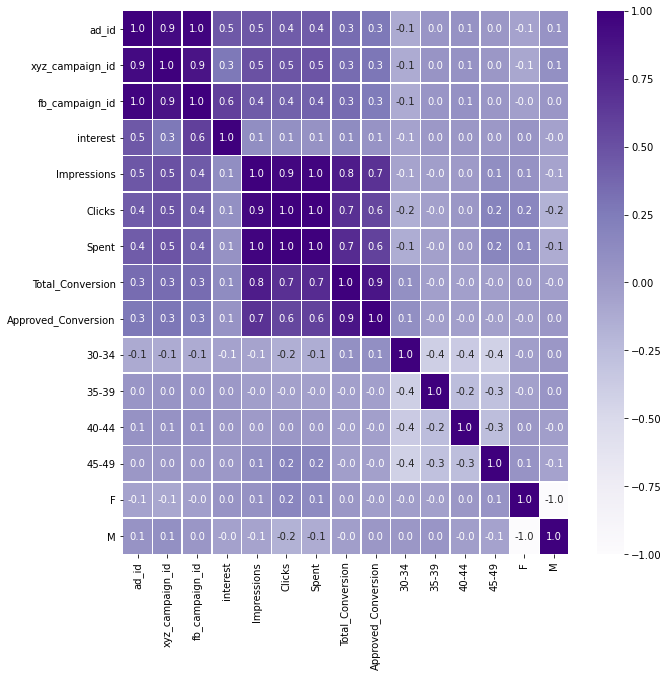

In [31]:
plt.figure(figsize=[10,10])
sns.heatmap(x.corr(), annot=True, cmap="Purples", linewidth=0.5, fmt='.1f')
plt.show()

In [32]:
x.drop(columns=x.columns[:4], axis=1, inplace=True)
x

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,30-34,35-39,40-44,45-49,F,M
0,M,15,7350,1,1.430000,2,1,1,0,0,0,0,1
1,M,16,17861,2,1.820000,2,0,1,0,0,0,0,1
2,M,20,693,0,0.000000,1,0,1,0,0,0,0,1
3,M,28,4259,1,1.250000,1,0,1,0,0,0,0,1
4,M,28,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,F,109,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,F,110,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,F,111,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,F,113,790253,135,198.710001,8,2,0,0,0,1,1,0


In [35]:
#elbow method
df2 = df.groupby('fb_campaign_id')[['interest', 'Impressions', 'Spent', 'Total_Conversion']].mean()
df2.head()

,interest,Impressions,Spent,Total_Conversion
fb_campaign_id,,,,
103916,15.0,7350.0,1.43,2.0
103917,16.0,17861.0,1.82,2.0
103920,20.0,693.0,0.00,1.0
103928,28.0,4196.0,1.27,1.0
103929,29.0,1915.0,0.00,1.0


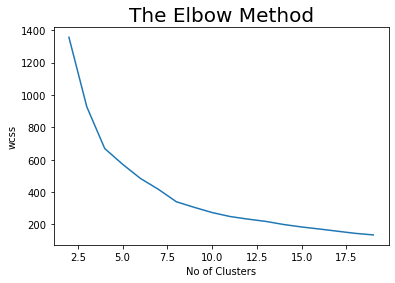

In [39]:
sc = StandardScaler()

sc_features = sc.fit_transform(df2.values)

wcss = []
for i in range(2, 20):
    km = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(sc_features)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
#5. 
MODEL = KMeans(n_clusters=8)
MODEL.fit(sc_features)

KMeans()

NameError: name 'MODEL' is not defined